# clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

## K-means
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C , each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
url = 'https://gist.githubusercontent.com/MaaniBeigy/3f55fcc77551b9c2218a9bf19e800f47/raw/8affb3ae2c9fe1725878b0cdc43dfb8da31ba164/df_total.csv'
df = pd.read_csv(url,index_col=None)

df["Temperature"] = StandardScaler().fit_transform(df[["Temperature"]])
df["GSR"] = StandardScaler().fit_transform(df[["GSR"]])
df["EOG1"] = StandardScaler().fit_transform(df[["EOG1"]])
df["EOG2"] = StandardScaler().fit_transform(df[["EOG2"]])
df["EEG1"] = StandardScaler().fit_transform(df[["EEG1"]])
df["EEG2"] = StandardScaler().fit_transform(df[["EEG2"]])
df["RED_RAW"] = StandardScaler().fit_transform(df[["RED_RAW"]])
df["IR_RAW"] = StandardScaler().fit_transform(df[["IR_RAW"]])
df["Arousal"] = StandardScaler().fit_transform(df[["Arousal"]])
df["Dominance"] = StandardScaler().fit_transform(df[["Dominance"]])
df["Valence"] = StandardScaler().fit_transform(df[["Valence"]])

x = df[[
        'Temperature', 'GSR', 'EOG1', 'EOG2', 'EEG1', 'EEG2', 'RED_RAW',
       'IR_RAW','Arousal','Dominance','Valence']].to_numpy()

X_train, X_test = train_test_split(x, test_size=0.5, random_state=1)

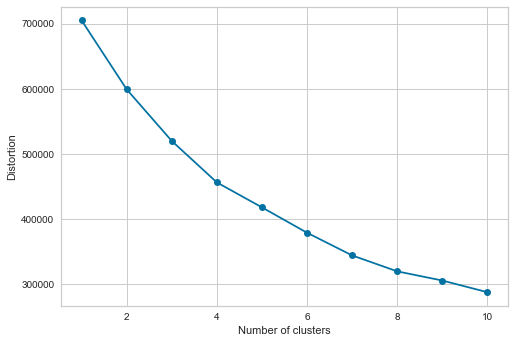

In [3]:
#ELBOW MET 1 :

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
 
# The number of clusters is 4 USING Elbow-Met

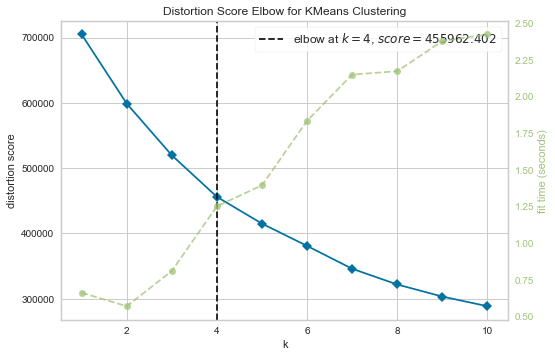

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
 # ELBOW MET 2 :

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
# With this method the numbers of clusters was 4

In [5]:
kmeans_model = KMeans(n_clusters=4, random_state=1,init='k-means++').fit(X_train)
labels = kmeans_model.labels_

kmeans_model_pred = KMeans(n_clusters=4, random_state=1,init='k-means++').fit(X_test)
labels_pred = kmeans_model_pred.labels_

In [6]:
clustering_metrics = {
    "Scores" : [
        metrics.completeness_score(labels, labels_pred),
        metrics.homogeneity_score(labels, labels_pred),
        metrics.calinski_harabasz_score(X_train, labels),
        metrics.rand_score(labels, labels_pred),
        metrics.davies_bouldin_score(X_train, labels),
        metrics.silhouette_score(X_train, labels),
        hopkins(x,64074)
    ]}
df_Metrics = pd.DataFrame(data=clustering_metrics, index=["calinski_harabasz",
 "homogeneity_score","rand_score", "davies_bouldin_score", "completeness_score",
  "silhouette_score", "hopkins"])


In [7]:
df_Metrics

,Scores
calinski_harabasz,0.000094
homogeneity_score,0.000093
rand_score,5128.166029
davies_bouldin_score,0.583358
completeness_score,1.825308
silhouette_score,0.186513
hopkins,0.004539


In [10]:
 #PCA :
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

kmeans_model = KMeans(n_clusters=4, random_state=1,init='k-means++').fit(principalComponents)

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

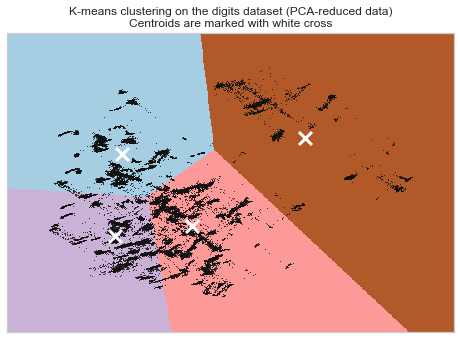

In [11]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(principalComponents[:, 0], principalComponents[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()